In [12]:
import numpy as np
import matplotlib.pyplot as plt

filename_list = ['2021-03-03_IAPP_2n5_sliceA_0V_dt_extracted.txt',
                '2021-03-03_IAPP_2n5_sliceA_10V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_20V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_30V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_40V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_50V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_60V_dt_extracted.txt',
                 '2021-03-03_IAPP_2n5_sliceA_70V_dt_extracted.txt']

#filename_list = ['2021-03-03_IAPP_2n5_sliceA_0V_dt_extracted.txt', 'fake_fake_fake_fake_10V_fake_fake.txt', 
 #        '2021-03-03_IAPP_2n5_sliceA_20V_dt_extracted.txt', '2021-03-03_IAPP_2n5_sliceA_30V_dt_extracted.txt', 
  #       '2021-03-03_IAPP_2n5_sliceA_40V_dt_extracted.txt', '2021-03-03_IAPP_2n5_sliceA_50V_dt_extracted.txt', 
   #      'fake_fake_fake_fake_60V_fake_fake.txt', 'fake_fake_fake_fake_70V_fake_fake.txt']



datastore = {}
for filename in filename_list:
    with open (filename, 'r') as f:
        filenameparts = filename.split('_')
        voltage = filenameparts[4].replace('V', '')
        voltage = int(voltage)
        arrtime = []
        intensity = []
        for dataline in f:
            dataline = dataline.replace('\n', '')
            arrtime_intensity = dataline.split('\t')
            arrtime.append(float(arrtime_intensity[0]))
            intensity.append(float(arrtime_intensity[1]))         
            pairs = list(zip(arrtime, intensity))
        datastore[voltage] = pairs

In [13]:
arrts_for2d = []
intens_for2d = []
volts_for2d = []

#for k, pair in datastore.items():
#    for i in pair:
#        if not i[1]:
#            continue
#        arrts_for2d.append(i[0])
#        intens_for2d.append(i[1])
#        volts_for2d.append(k)
for k, pair in datastore.items():
    for i in pair:
        arrts_for2d.append(i[0])
        intens_for2d.append(i[1])
        volts_for2d.append(k)
                
#going to try without taking out zeros for now

(100, 100)


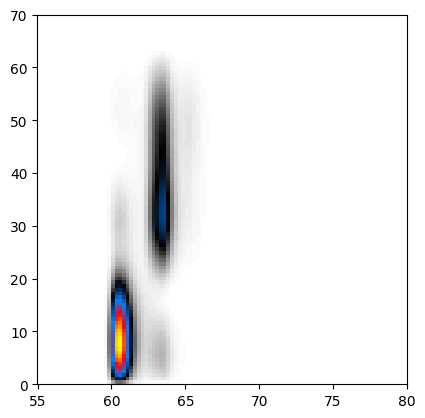

In [14]:
from scipy.interpolate import interp2d, RectBivariateSpline
from matplotlib.colors import LinearSegmentedColormap

#X2d = np.array(arrts_for2d)
#Y2d = np.array(volts_for2d)
#Z2d = np.array(intens_for2d)

X2d = np.array(sorted(set(arrts_for2d))) #flat list
Y2d = np.array(sorted(set(volts_for2d))) #flat list 0 to 70 once
Z2d = np.array(intens_for2d)
Z2d = Z2d.reshape(len(Y2d), len(X2d)).T

#interp_func = interp2d(X2d, Y2d, Z2d, kind='cubic', fill_value=0.0)
interp_func = RectBivariateSpline(X2d, Y2d, Z2d, bbox=[None, None, None, None], kx=3, ky=3, s=0)

X_max = 80
X_min = X2d.min()
Y_min = 0
Y_max = 70

n_smooth = 100

X2d_plot = np.linspace(X_min, X_max, n_smooth)
Y2d_plot = np.linspace(Y_min, Y_max, n_smooth) 

Intens2d_plot = interp_func(X2d_plot, Y2d_plot).T
Intens2d_plot = np.clip(Intens2d_plot, a_min = 0, a_max = None)


#Intens2d_plot = interp_func(X2d_plot, Y2d_plot)
print(Intens2d_plot.shape)

#density_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FFFFFF','#000080','#0080FF'], N=256)
density_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FFFFFF', '#000000','#0080FF','#FF0000','#FFFF00'], N=256)

fig, ax = plt.subplots()
x_range = (X_min, X_max) #min and max, effectively, cos it's sorted
y_range = (Y_min, Y_max)

aspect = (x_range[1] - x_range[0])/(y_range[1] - y_range[0])

#Intens2d_plot = np.clip(Intens2d_plot, 0.0, None)

ax.imshow(Intens2d_plot, cmap=density_colormap, origin='lower', extent=x_range + y_range, aspect=aspect, vmin=0.0)
plt.show()

In [15]:
Volts_new = Y2d_plot # np.linspace(0, 70, 200)

n,m = Intens2d_plot.shape

x_smootharrT_coords = []
y_smoothV_coords = []
smooth_intensities = []

for i in range(n):
    for j in range(m):
        intensity_value = int(Intens2d_plot[j,i])
        x_smootharrT_coords.append(X2d_plot[i])        
        y_smoothV_coords.append(Volts_new[j])
        smooth_intensities.append(intensity_value)
print(len(x_smootharrT_coords)) #40,000
print(len(y_smoothV_coords)) #40,000 i.e. 200*200
print(len(smooth_intensities)) #40,000 i.e. 200*200

smoothxycoords = list(zip(x_smootharrT_coords, y_smoothV_coords))
smoothxycoords = np.array(smoothxycoords)
smooth_intensities = np.array(smooth_intensities)

print(smoothxycoords.min(axis=0), smoothxycoords.max(axis=0))

10000
10000
10000
[54.982  0.   ] [80. 70.]


[1] Improvement: 16803779.858622193	Time (s): 0.01293
[2] Improvement: 5749327.370961666	Time (s): 0.01197
[3] Improvement: 2060198.2694125175	Time (s): 0.01097
[4] Improvement: 1017120.1064076424	Time (s): 0.01197
[5] Improvement: 769840.567470789	Time (s): 0.01097
[6] Improvement: 647934.1573146582	Time (s): 0.01197
[7] Improvement: 470652.09213876724	Time (s): 0.012
[8] Improvement: 331375.5240728855	Time (s): 0.01193
[9] Improvement: 274833.5761805773	Time (s): 0.01201
[10] Improvement: 231578.52438664436	Time (s): 0.01296
[11] Improvement: 196148.41542339325	Time (s): 0.01197
[12] Improvement: 166436.5497611761	Time (s): 0.01193
[13] Improvement: 141740.53575718403	Time (s): 0.01301
[14] Improvement: 121769.01688861847	Time (s): 0.01196
[15] Improvement: 105871.7397159338	Time (s): 0.01197
[16] Improvement: 93188.99072015285	Time (s): 0.01397
[17] Improvement: 83245.45797240734	Time (s): 0.01296
[18] Improvement: 75550.68828701973	Time (s): 0.01393
[19] Improvement: 69546.15428793

[155] Improvement: 106.6715475320816	Time (s): 0.01392
[156] Improvement: 105.99416184425354	Time (s): 0.01197
[157] Improvement: 105.34913897514343	Time (s): 0.01197
[158] Improvement: 104.73535323143005	Time (s): 0.01296
[159] Improvement: 104.15172600746155	Time (s): 0.01297
[160] Improvement: 103.59724617004395	Time (s): 0.012
[161] Improvement: 103.07095324993134	Time (s): 0.01197
[162] Improvement: 102.571932554245	Time (s): 0.01293
[163] Improvement: 102.0993150472641	Time (s): 0.012
[164] Improvement: 101.65224945545197	Time (s): 0.01197
[165] Improvement: 101.22998654842377	Time (s): 0.01197
[166] Improvement: 100.83173537254333	Time (s): 0.01197
[167] Improvement: 100.45681345462799	Time (s): 0.01196
[168] Improvement: 100.10454249382019	Time (s): 0.01197
[169] Improvement: 99.77425158023834	Time (s): 0.01197
[170] Improvement: 99.46536600589752	Time (s): 0.01292
[171] Improvement: 99.17727994918823	Time (s): 0.01201
[172] Improvement: 98.90945410728455	Time (s): 0.01196
[173

[310] Improvement: 214.79803323745728	Time (s): 0.01393
[311] Improvement: 217.7032561302185	Time (s): 0.013
[312] Improvement: 220.6958383321762	Time (s): 0.01197
[313] Improvement: 223.780770778656	Time (s): 0.01197
[314] Improvement: 226.96347773075104	Time (s): 0.01201
[315] Improvement: 230.24984526634216	Time (s): 0.01196
[316] Improvement: 233.64623069763184	Time (s): 0.01197
[317] Improvement: 237.15948283672333	Time (s): 0.01196
[318] Improvement: 240.7970072031021	Time (s): 0.01297
[319] Improvement: 244.56667339801788	Time (s): 0.01197
[320] Improvement: 248.4769163131714	Time (s): 0.01296
[321] Improvement: 252.53658950328827	Time (s): 0.01197
[322] Improvement: 256.7550220489502	Time (s): 0.01193
[323] Improvement: 261.14175164699554	Time (s): 0.01197
[324] Improvement: 265.7065373659134	Time (s): 0.01197
[325] Improvement: 270.4589794874191	Time (s): 0.01201
[326] Improvement: 275.4083330631256	Time (s): 0.01196
[327] Improvement: 280.5630530118942	Time (s): 0.01197
[328]

[460] Improvement: 595.0298317670822	Time (s): 0.02394
[461] Improvement: 594.9000977277756	Time (s): 0.016
[462] Improvement: 594.816083908081	Time (s): 0.01392
[463] Improvement: 594.778937458992	Time (s): 0.01596
[464] Improvement: 594.7898532152176	Time (s): 0.01396
[465] Improvement: 594.8499656915665	Time (s): 0.01296
[466] Improvement: 594.9604575634003	Time (s): 0.01297
[467] Improvement: 595.1224900484085	Time (s): 0.01695
[468] Improvement: 595.3372224569321	Time (s): 0.01396
[469] Improvement: 595.6058362722397	Time (s): 0.01795
[470] Improvement: 595.9295219182968	Time (s): 0.01596
[471] Improvement: 596.3094658851624	Time (s): 0.01596
[472] Improvement: 596.7468854188919	Time (s): 0.01197
[473] Improvement: 597.2430064678192	Time (s): 0.01297
[474] Improvement: 597.7990756034851	Time (s): 0.01297
[475] Improvement: 598.4163612127304	Time (s): 0.01895
[476] Improvement: 599.0961647033691	Time (s): 0.01596
[477] Improvement: 599.8397949934006	Time (s): 0.01296
[478] Improvem

[624] Improvement: 976.8423354625702	Time (s): 0.01193
[625] Improvement: 956.8029148578644	Time (s): 0.015
[626] Improvement: 937.2155786752701	Time (s): 0.01193
[627] Improvement: 918.1170780658722	Time (s): 0.01197
[628] Improvement: 899.7051186561584	Time (s): 0.01201
[629] Improvement: 881.7824045419693	Time (s): 0.01197
[630] Improvement: 864.3504412174225	Time (s): 0.01196
[631] Improvement: 847.3609018325806	Time (s): 0.01197
[632] Improvement: 830.7757588624954	Time (s): 0.01193
[633] Improvement: 814.5693694353104	Time (s): 0.01201
[634] Improvement: 798.7238876819611	Time (s): 0.01196
[635] Improvement: 783.2259085178375	Time (s): 0.01196
[636] Improvement: 768.0645432472229	Time (s): 0.01197
[637] Improvement: 753.2303725481033	Time (s): 0.01296
[638] Improvement: 738.7149573564529	Time (s): 0.01193
[639] Improvement: 724.5104176998138	Time (s): 0.01197
[640] Improvement: 710.6093146800995	Time (s): 0.01097
[641] Improvement: 697.0045671463013	Time (s): 0.01297
[642] Improv

[778] Improvement: 79.54970860481262	Time (s): 0.014
[779] Improvement: 78.56709659099579	Time (s): 0.02194
[780] Improvement: 77.59959614276886	Time (s): 0.01695
[781] Improvement: 76.64691877365112	Time (s): 0.01193
[782] Improvement: 75.70878398418427	Time (s): 0.01197
[783] Improvement: 74.78492164611816	Time (s): 0.01097
[784] Improvement: 73.87506079673767	Time (s): 0.01197
[785] Improvement: 72.97892367839813	Time (s): 0.01201
[786] Improvement: 72.09628689289093	Time (s): 0.01197
[787] Improvement: 71.22687029838562	Time (s): 0.01196
[788] Improvement: 70.3704434633255	Time (s): 0.01193
[789] Improvement: 69.52674508094788	Time (s): 0.01197
[790] Improvement: 68.69558143615723	Time (s): 0.01197
[791] Improvement: 67.87667715549469	Time (s): 0.01197
[792] Improvement: 67.06983780860901	Time (s): 0.01197
[793] Improvement: 66.27483069896698	Time (s): 0.013
[794] Improvement: 65.49143409729004	Time (s): 0.01393
[795] Improvement: 64.71944808959961	Time (s): 0.01296
[796] Improveme

[933] Improvement: 15.456814050674438	Time (s): 0.01491
[934] Improvement: 15.311155319213867	Time (s): 0.01297
[935] Improvement: 15.16698932647705	Time (s): 0.013
[936] Improvement: 15.024298787117004	Time (s): 0.01197
[937] Improvement: 14.883069515228271	Time (s): 0.01197
[938] Improvement: 14.743273735046387	Time (s): 0.01193
[939] Improvement: 14.60490894317627	Time (s): 0.01297
[940] Improvement: 14.467949628829956	Time (s): 0.01201
[941] Improvement: 14.332381248474121	Time (s): 0.01196
[942] Improvement: 14.198187112808228	Time (s): 0.01297
[943] Improvement: 14.065361380577087	Time (s): 0.01197
[944] Improvement: 13.933870077133179	Time (s): 0.01193
[945] Improvement: 13.803722858428955	Time (s): 0.012
[946] Improvement: 13.674875974655151	Time (s): 0.01197
[947] Improvement: 13.54732882976532	Time (s): 0.01296
[948] Improvement: 13.42107355594635	Time (s): 0.01197
[949] Improvement: 13.29608952999115	Time (s): 0.01197
[950] Improvement: 13.17236077785492	Time (s): 0.01193
[9

[1093] Improvement: 3.658381462097168	Time (s): 0.01692
[1094] Improvement: 3.6269084215164185	Time (s): 0.01297
[1095] Improvement: 3.5957213640213013	Time (s): 0.01197
[1096] Improvement: 3.5648255348205566	Time (s): 0.013
[1097] Improvement: 3.5341930389404297	Time (s): 0.01193
[1098] Improvement: 3.5038527250289917	Time (s): 0.01097
[1099] Improvement: 3.4737744331359863	Time (s): 0.01301
[1100] Improvement: 3.443971633911133	Time (s): 0.01197
[1101] Improvement: 3.4144386053085327	Time (s): 0.01196
[1102] Improvement: 3.3851680755615234	Time (s): 0.01197
[1103] Improvement: 3.356161952018738	Time (s): 0.01193
[1104] Improvement: 3.3274247646331787	Time (s): 0.013
[1105] Improvement: 3.298936605453491	Time (s): 0.01197
[1106] Improvement: 3.270704746246338	Time (s): 0.01197
[1107] Improvement: 3.2427313327789307	Time (s): 0.01196
[1108] Improvement: 3.215006470680237	Time (s): 0.01197
[1109] Improvement: 3.1875332593917847	Time (s): 0.01197
[1110] Improvement: 3.1603057384490967	Ti

[1248] Improvement: 1.0001507997512817	Time (s): 0.01995
[1249] Improvement: 0.9920721054077148	Time (s): 0.01596
[1250] Improvement: 0.9840656518936157	Time (s): 0.01396
[1251] Improvement: 0.9761247634887695	Time (s): 0.01596
[1252] Improvement: 0.9682474136352539	Time (s): 0.01296
[1253] Improvement: 0.9604445695877075	Time (s): 0.01197
[1254] Improvement: 0.9526985883712769	Time (s): 0.01297
[1255] Improvement: 0.9450229406356812	Time (s): 0.01296
[1256] Improvement: 0.9374147653579712	Time (s): 0.01396
[1257] Improvement: 0.9298635721206665	Time (s): 0.01197
[1258] Improvement: 0.9223804473876953	Time (s): 0.012
[1259] Improvement: 0.9149563312530518	Time (s): 0.01197
[1260] Improvement: 0.9076006412506104	Time (s): 0.01197
[1261] Improvement: 0.9003065824508667	Time (s): 0.01294
[1262] Improvement: 0.8930705785751343	Time (s): 0.01201
[1263] Improvement: 0.8858954906463623	Time (s): 0.01196
[1264] Improvement: 0.8787801265716553	Time (s): 0.01292
[1265] Improvement: 0.87172579765

[1404] Improvement: 0.29259324073791504	Time (s): 0.01292
[1405] Improvement: 0.2903566360473633	Time (s): 0.01695
[1406] Improvement: 0.28814518451690674	Time (s): 0.01297
[1407] Improvement: 0.28594815731048584	Time (s): 0.01197
[1408] Improvement: 0.28377318382263184	Time (s): 0.01301
[1409] Improvement: 0.2816040515899658	Time (s): 0.01292
[1410] Improvement: 0.27946388721466064	Time (s): 0.01197
[1411] Improvement: 0.27733802795410156	Time (s): 0.01201
[1412] Improvement: 0.2752211093902588	Time (s): 0.01197
[1413] Improvement: 0.2731360197067261	Time (s): 0.01292
[1414] Improvement: 0.27105915546417236	Time (s): 0.01301
[1415] Improvement: 0.2689911127090454	Time (s): 0.01097
[1416] Improvement: 0.26695215702056885	Time (s): 0.01096
[1417] Improvement: 0.26492393016815186	Time (s): 0.01193
[1418] Improvement: 0.2629055976867676	Time (s): 0.01301
[1419] Improvement: 0.2609224319458008	Time (s): 0.01193
[1420] Improvement: 0.2589303255081177	Time (s): 0.013
[1421] Improvement: 0.25

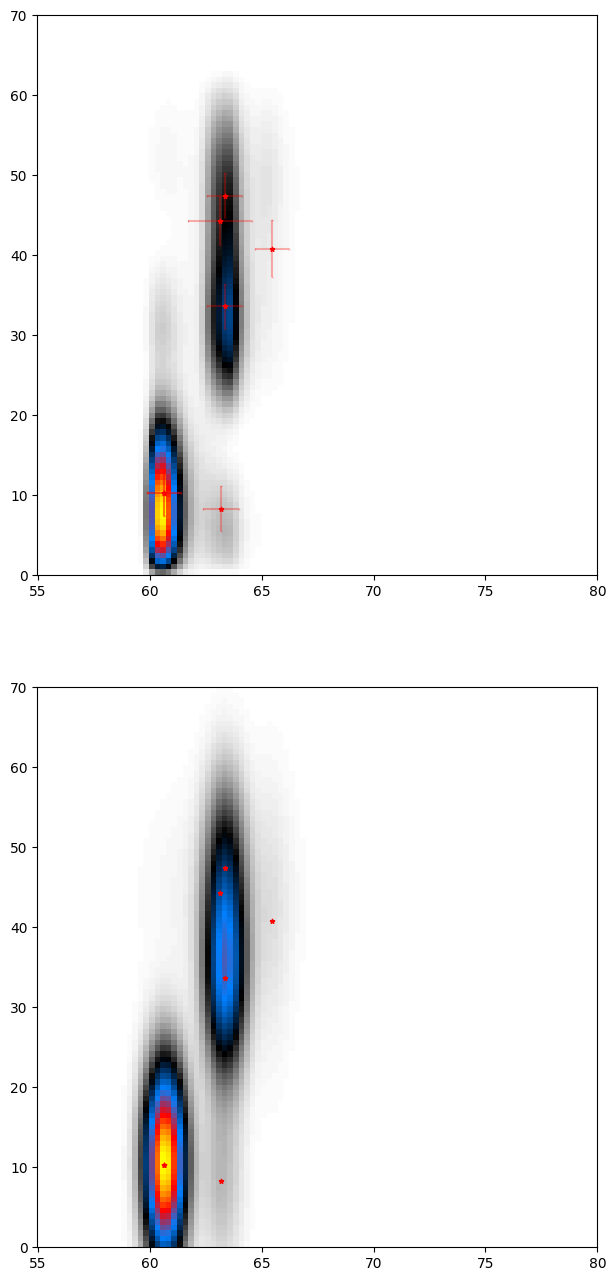

In [20]:
import pomegranate
from pomegranate import GeneralMixtureModel, MultivariateGaussianDistribution, IndependentComponentsDistribution, NormalDistribution
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

class MinStdNormalDistributionX(NormalDistribution):
    def __init__(self, *args, **kw):
        kw['min_std'] =  0.6 #0.1 #0.8 #1 #2#0.6
        NormalDistribution.__init__(self, *args, **kw)
class MinStdNormalDistributionY(NormalDistribution):
    def __init__(self, *args, **kw):
        kw['min_std'] = 8 #8 #1 #5#11 ##stick w 10
        NormalDistribution.__init__(self, *args, **kw)

test_n_components = [7]

fig1, axarr = plt.subplots(2, len(test_n_components), squeeze=False)
fig1.set_size_inches(16,16)

gmmlist = [] #objects for 3,4,5 components
for i, n_comp in enumerate(test_n_components):
 
    gmm = GeneralMixtureModel.from_samples([MinStdNormalDistributionX, MinStdNormalDistributionY],
                                         n_comp, smoothxycoords, smooth_intensities, n_init=10, max_kmeans_iterations=50, 
                                          stop_threshold=0.1, lr_decay=0.5, verbose=True)
    gmmlist.append(gmm)
    df = (5 * n_comp) - 1
    lp = (gmm.log_probability(smoothxycoords) * smooth_intensities).sum() #sum, as in log space, normally porbs would multiply. 
    bic = float(df * np.log(len(smoothxycoords)) - 2.0 * lp) # For evaluating best n_comp
    
    # For independent x,y normals
    comp_params = [comp.parameters[0] for comp in gmm.distributions] # Selects IndependentComponentsDistribution for each Gaussian
    x_params = [cp[0].parameters for cp in comp_params] # NormalDistribution for X : Mean, Var pairs
    y_params = [cp[1].parameters for cp in comp_params] # NormalDistribution for Y : Mean, Var pairs
  
    x_vals_mean, x_vals_var = zip(*x_params) 
    y_vals_mean, y_vals_var = zip(*y_params) 
    
  # Sqrt for Var to Std
    x_vals_std = np.sqrt(x_vals_var)
    y_vals_std = np.sqrt(y_vals_var)

    print(y_vals_mean)

    ax1 = axarr[0,i] #
    ax1.set_xlim(X_min, X_max)
    ax1.set_ylim(Y_min, Y_max)
    aspect = (X_max - X_min)/(Y_max - Y_min)
    ax1.imshow(Intens2d_plot, cmap=density_colormap, origin='lower', extent=(X_min, X_max, Y_min, Y_max), aspect=aspect) 
    ax1.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')
    ax1.errorbar(x_vals_mean, y_vals_mean, y_vals_std, x_vals_std, fmt='none',
               color='red',alpha=0.3,  label='StdDevs', capsize=0.5)


    #xgap = (max(x_smootharrT_coords) - min(x_smootharrT_coords))/10 
    #x_grange = (min(x_smootharrT_coords)-xgap, max(x_smootharrT_coords)+xgap) 
    #n_grid = 100
    x_points = X2d_plot # np.linspace(X_min, X_max, n_grid) 
    y_points = Y2d_plot # np.linspace(Y_min, Y_max, n_grid)
    
    x_grid, y_grid = np.meshgrid(x_points, y_points) # n_grid , n_grid of smoothxycoords
    x_grid_flat = x_grid.ravel()  # Flatten to list
    y_grid_flat = y_grid.ravel() 
    stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1) # to get x,y pairs

    density = gmmlist[i].log_probability(stacked_points) # comes as log probabilties
    density = np.exp(density) # Real probs
    density_2d = density.reshape([len(x_points), len(y_points)]) # Restore points grid (of heights)

    ax2 = axarr[1,i]
    ax2.set_xlim(X_min, X_max)
    ax2.set_ylim(Y_min, Y_max)
    aspect = (X_max - X_min)/(Y_max - Y_min)
    ax2.imshow(density_2d, cmap=density_colormap, origin='lower', extent=(X_min, X_max, Y_min, Y_max), aspect=aspect) 
    ax2.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')
    
plt.show() 

In [ ]:
#run1_both faints and a third one(fake1)
#run2_both faints and a third one(fake1)
#run3_both faints and a third one(fake1)

#sd back to 5, fails to find faints(fake1)
#sd to 10, doesn't find faints(fake1)

#run4_both faints and a third one(fake1)

#real_data, sd8, gets right faint
#real_data, sd8, fails both faints
#real_data, sd8, gets right faint
#real_data, sd8, fails both faints
#real_data, sd8, gets right faint